<a href="https://colab.research.google.com/github/Kuyas/TimeSeriesEntropy/blob/master/Pollution_Data_Entropy_Initial_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tabulate import tabulate
import pandas as pd
import time as time
import seaborn as sns
import pickle
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def save_obj(obj, name ):
    with open('/content/drive/My Drive/TimeSeries/save/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
    print("saved: ",name)
def load_obj(name ):
    with open('/content/drive/My Drive/TimeSeries/save/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [0]:
df = pd.read_csv("/content/drive/My Drive/TimeSeries/PRSA_Data_Aotizhongxin_20130301-20170228.csv") #read csv
df1 = pd.to_datetime(df.iloc[:,1:5]) # convert the year-month-day-hour column to datetime format for time series
Aotizhongxin = pd.concat([df, df1], axis=1, sort=False) # concat the datetime to original csv
Aotizhongxin = Aotizhongxin.rename(columns = {0:"DateTime"}) # rename the concat'd column
Aotizhongxin = Aotizhongxin.set_index('DateTime') # make the concat'd column as the index/serial
cols_to_norm = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
# Aotizhongxin[cols_to_norm] = Aotizhongxin[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the columns
display(Aotizhongxin.head())
print(Aotizhongxin.shape)
Aotizhongxin = Aotizhongxin.dropna()
print(Aotizhongxin.shape)
cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']
col = ['PM2.5']
# Aotizhongxin[cols].plot(subplots=True, linestyle='-', figsize=(40, 40))
# plt.show()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DateTime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


(35064, 18)
(31815, 18)


In [0]:
df = pd.read_csv("/content/drive/My Drive/TimeSeries/PRSA_Data_Changping_20130301-20170228.csv") #read csv
df1 = pd.to_datetime(df.iloc[:,1:5]) # convert the year-month-day-hour column to datetime format for time series
Changping = pd.concat([df, df1], axis=1, sort=False) # concat the datetime to original csv
Changping = Changping.rename(columns = {0:"DateTime"}) # rename the concat'd column
Changping = Changping.set_index('DateTime') # make the concat'd column as the index/serial
cols_to_norm = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
# Changping[cols_to_norm] = Changping[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the columns
display(Changping.head(1002))
Changping = Changping.dropna()
print(Changping.shape)
cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']
col = ['PM2.5']
# Changping[cols].plot(subplots=True, linestyle='-', figsize=(40, 40))
# plt.show()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DateTime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,3.0,6.0,13.0000,7.0000,300.0,85.0000,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
2013-03-01 01:00:00,2,2013,3,1,1,3.0,3.0,6.0000,6.0000,300.0,85.0000,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2013-03-01 02:00:00,3,2013,3,1,2,3.0,3.0,22.0000,13.0000,400.0,74.0000,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
2013-03-01 03:00:00,4,2013,3,1,3,3.0,6.0,12.0000,8.0000,300.0,81.0000,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,14.0000,8.0000,300.0,81.0000,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-04-11 13:00:00,998,2013,4,11,13,12.0,24.0,3.0000,6.0000,200.0,101.3166,15.9,1008.2,-13.5,0.0,N,3.2,Changping
2013-04-11 14:00:00,999,2013,4,11,14,11.0,36.0,3.0000,5.0000,200.0,101.3166,17.0,1007.2,-12.7,0.0,N,2.4,Changping
2013-04-11 15:00:00,1000,2013,4,11,15,5.0,21.0,1.1424,5.1325,NaN,102.8160,17.4,1006.6,-12.4,0.0,NE,3.1,Changping


(32681, 18)


In [0]:
df = pd.read_csv("/content/drive/My Drive/TimeSeries/PRSA_Data_Dingling_20130301-20170228.csv") #read csv
df1 = pd.to_datetime(df.iloc[:,1:5]) # convert the year-month-day-hour column to datetime format for time series
Dingling = pd.concat([df, df1], axis=1, sort=False) # concat the datetime to original csv
Dingling = Dingling.rename(columns = {0:"DateTime"}) # rename the concat'd column
Dingling = Dingling.set_index('DateTime') # make the concat'd column as the index/serial
cols_to_norm = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
# Dingling[cols_to_norm] = Dingling[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the columns
display(Dingling.head())
Dingling = Dingling.dropna()
print(Dingling.shape)
cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']
col = ['PM2.5']
# Dingling[cols].plot(subplots=True, linestyle='-', figsize=(40, 40))
# plt.show()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DateTime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


(31306, 18)


In [0]:
df = pd.read_csv("/content/drive/My Drive/TimeSeries/PRSA_Data_Dongsi_20130301-20170228.csv") #read csv
df1 = pd.to_datetime(df.iloc[:,1:5]) # convert the year-month-day-hour column to datetime format for time series
Dongsi = pd.concat([df, df1], axis=1, sort=False) # concat the datetime to original csv
Dongsi = Dongsi.rename(columns = {0:"DateTime"}) # rename the concat'd column
Dongsi = Dongsi.set_index('DateTime') # make the concat'd column as the index/serial
cols_to_norm = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
# Dongsi[cols_to_norm] = Dongsi[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the columns
display(Dongsi.head())
Dongsi = Dongsi.dropna()
print(Dongsi.shape)
cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']
col = ['PM2.5']
# Dongsi[cols].plot(subplots=True, linestyle='-', figsize=(40, 40))
# plt.show()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DateTime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
2013-03-01 01:00:00,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
2013-03-01 03:00:00,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


(30338, 18)


In [0]:
df = pd.read_csv("/content/drive/My Drive/TimeSeries/PRSA_Data_Guanyuan_20130301-20170228.csv") #read csv
df1 = pd.to_datetime(df.iloc[:,1:5]) # convert the year-month-day-hour column to datetime format for time series
Guanyuan = pd.concat([df, df1], axis=1, sort=False) # concat the datetime to original csv
Guanyuan = Guanyuan.rename(columns = {0:"DateTime"}) # rename the concat'd column
Guanyuan = Guanyuan.set_index('DateTime') # make the concat'd column as the index/serial
cols_to_norm = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
# Guanyuan[cols_to_norm] = Guanyuan[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the columns
display(Guanyuan.head())
Guanyuan = Guanyuan.dropna()
print(Guanyuan.shape)
cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']
col = ['PM2.5']
# Guanyuan[cols].plot(subplots=True, linestyle='-', figsize=(40, 40))
# plt.show()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DateTime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
2013-03-01 01:00:00,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2013-03-01 02:00:00,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
2013-03-01 03:00:00,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
2013-03-01 04:00:00,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


(32263, 18)


In [0]:
df = pd.read_csv("/content/drive/My Drive/TimeSeries/PRSA_Data_Gucheng_20130301-20170228.csv") #read csv
df1 = pd.to_datetime(df.iloc[:,1:5]) # convert the year-month-day-hour column to datetime format for time series
Gucheng = pd.concat([df, df1], axis=1, sort=False) # concat the datetime to original csv
Gucheng = Gucheng.rename(columns = {0:"DateTime"}) # rename the concat'd column
Gucheng = Gucheng.set_index('DateTime') # make the concat'd column as the index/serial
cols_to_norm = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
# Gucheng[cols_to_norm] = Gucheng[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the columns
display(Gucheng.head())
Gucheng = Gucheng.dropna()
print(Gucheng.shape)
cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']
col = ['PM2.5']
# Gucheng[cols].plot(subplots=True, linestyle='-', figsize=(40, 40))
# plt.show()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DateTime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
2013-03-01 01:00:00,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2013-03-01 02:00:00,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
2013-03-01 03:00:00,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
2013-03-01 04:00:00,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


(32504, 18)


In [0]:
df = pd.read_csv("/content/drive/My Drive/TimeSeries/PRSA_Data_Huairou_20130301-20170228.csv") #read csv
df1 = pd.to_datetime(df.iloc[:,1:5]) # convert the year-month-day-hour column to datetime format for time series
Huairou = pd.concat([df, df1], axis=1, sort=False) # concat the datetime to original csv
Huairou = Huairou.rename(columns = {0:"DateTime"}) # rename the concat'd column
Huairou = Huairou.set_index('DateTime') # make the concat'd column as the index/serial
cols_to_norm = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
# Huairou[cols_to_norm] = Huairou[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the columns
display(Huairou.head())
Huairou = Huairou.dropna()
print(Huairou.shape)
cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']
col = ['PM2.5']
# Huairou[cols].plot(subplots=True, linestyle='-', figsize=(40, 40))
# plt.show()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DateTime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
2013-03-01 01:00:00,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2013-03-01 02:00:00,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
2013-03-01 03:00:00,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


(31708, 18)


In [0]:
df = pd.read_csv("/content/drive/My Drive/TimeSeries/PRSA_Data_Nongzhanguan_20130301-20170228.csv") #read csv
df1 = pd.to_datetime(df.iloc[:,1:5]) # convert the year-month-day-hour column to datetime format for time series
Nongzhanguan = pd.concat([df, df1], axis=1, sort=False) # concat the datetime to original csv
Nongzhanguan = Nongzhanguan.rename(columns = {0:"DateTime"}) # rename the concat'd column
Nongzhanguan = Nongzhanguan.set_index('DateTime') # make the concat'd column as the index/serial
cols_to_norm = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
# Nongzhanguan[cols_to_norm] = Nongzhanguan[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the columns
display(Nongzhanguan.head())
Nongzhanguan = Nongzhanguan.dropna()
print(Nongzhanguan.shape)

cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']
col = ['PM2.5']
# Nongzhanguan[cols].plot(subplots=True, linestyle='-', figsize=(40, 40))
# plt.show()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DateTime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
2013-03-01 01:00:00,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2013-03-01 02:00:00,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
2013-03-01 03:00:00,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


(33114, 18)


In [0]:
df = pd.read_csv("/content/drive/My Drive/TimeSeries/PRSA_Data_Shunyi_20130301-20170228.csv") #read csv
df1 = pd.to_datetime(df.iloc[:,1:5]) # convert the year-month-day-hour column to datetime format for time series
Shunyi = pd.concat([df, df1], axis=1, sort=False) # concat the datetime to original csv
Shunyi = Shunyi.rename(columns = {0:"DateTime"}) # rename the concat'd column
Shunyi = Shunyi.set_index('DateTime') # make the concat'd column as the index/serial
cols_to_norm = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
# Shunyi[cols_to_norm] = Shunyi[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the columns
display(Shunyi.head())
Shunyi = Shunyi.dropna()
print(Shunyi.shape)
cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']
col = ['PM2.5']
# Shunyi[cols].plot(subplots=True, linestyle='-', figsize=(40, 40))
# plt.show()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DateTime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
2013-03-01 01:00:00,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2013-03-01 02:00:00,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
2013-03-01 03:00:00,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
2013-03-01 04:00:00,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


(30194, 18)


In [0]:
df = pd.read_csv("/content/drive/My Drive/TimeSeries/PRSA_Data_Tiantan_20130301-20170228.csv") #read csv
df1 = pd.to_datetime(df.iloc[:,1:5]) # convert the year-month-day-hour column to datetime format for time series
Tiantan = pd.concat([df, df1], axis=1, sort=False) # concat the datetime to original csv
Tiantan = Tiantan.rename(columns = {0:"DateTime"}) # rename the concat'd column
Tiantan = Tiantan.set_index('DateTime') # make the concat'd column as the index/serial
cols_to_norm = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
# Tiantan[cols_to_norm] = Tiantan[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the columns
display(Tiantan.head())
Tiantan = Tiantan.dropna()
print(Tiantan.shape)

cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']
col = ['PM2.5']
# Tiantan[cols].plot(subplots=True, linestyle='-', figsize=(40, 40))
# plt.show()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DateTime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
2013-03-01 01:00:00,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2013-03-01 02:00:00,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


(32843, 18)


In [0]:
df = pd.read_csv("/content/drive/My Drive/TimeSeries/PRSA_Data_Wanliu_20130301-20170228.csv") #read csv
df1 = pd.to_datetime(df.iloc[:,1:5]) # convert the year-month-day-hour column to datetime format for time series
Wanliu = pd.concat([df, df1], axis=1, sort=False) # concat the datetime to original csv
Wanliu = Wanliu.rename(columns = {0:"DateTime"}) # rename the concat'd column
Wanliu = Wanliu.set_index('DateTime') # make the concat'd column as the index/serial
cols_to_norm = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
# Wanliu[cols_to_norm] = Wanliu[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the columns
display(Wanliu.head())
Wanliu = Wanliu.dropna()
print(Wanliu.shape)
cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']
col = ['PM2.5']
# Wanliu[cols].plot(subplots=True, linestyle='-', figsize=(40, 40))
# plt.show()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DateTime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
2013-03-01 01:00:00,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2013-03-01 02:00:00,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
2013-03-01 03:00:00,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
2013-03-01 04:00:00,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


(30634, 18)


In [0]:
df = pd.read_csv("/content/drive/My Drive/TimeSeries/PRSA_Data_Wanshouxigong_20130301-20170228.csv") #read csv
df1 = pd.to_datetime(df.iloc[:,1:5]) # convert the year-month-day-hour column to datetime format for time series
Wanshouxigong = pd.concat([df, df1], axis=1, sort=False) # concat the datetime to original csv
Wanshouxigong = Wanshouxigong.rename(columns = {0:"DateTime"}) # rename the concat'd column
Wanshouxigong = Wanshouxigong.set_index('DateTime') # make the concat'd column as the index/serial
cols_to_norm = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
# Wanshouxigong[cols_to_norm] = Wanshouxigong[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the columns
display(Wanshouxigong.head())
Wanshouxigong = Wanshouxigong.dropna()
print(Wanshouxigong.shape)
cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','wd','WSPM']
col = ['PM2.5']
# Wanshouxigong[cols].plot(subplots=True, linestyle='-', figsize=(40, 40))
# plt.show()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
DateTime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
2013-03-01 01:00:00,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2013-03-01 02:00:00,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
2013-03-01 03:00:00,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
2013-03-01 04:00:00,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


(32768, 18)


# Entropy

## Sample Entropy

In [0]:
def sample_entropy(time_series, sample_length, tolerance = None):
    """Calculates the sample entropy of degree m of a time_series.
    This method uses chebychev norm.
    It is quite fast for random data, but can be slower is there is
    structure in the input time series.
    Args:
        time_series: numpy array of time series
        sample_length: length of longest template vector
        tolerance: tolerance (defaults to 0.1 * std(time_series)))
    Returns:
        Array of sample entropies:
            SE[k] is ratio "#templates of length k+1" / "#templates of length k"
            where #templates of length 0" = n*(n - 1) / 2, by definition
    Note:
        The parameter 'sample_length' is equal to m + 1 in Ref[1].
    References:
        [1] http://en.wikipedia.org/wiki/Sample_Entropy
        [2] http://physionet.incor.usp.br/physiotools/sampen/
        [3] Madalena Costa, Ary Goldberger, CK Peng. Multiscale entropy analysis
            of biological signals
    """
    #The code below follows the sample length convention of Ref [1] so:
    M = sample_length - 1;

    time_series = np.array(time_series)
    if tolerance is None:
        tolerance = 0.1*np.std(time_series)

    n = len(time_series)

    #Ntemp is a vector that holds the number of matches. N[k] holds matches templates of length k
    Ntemp = np.zeros(M + 2)
    #Templates of length 0 matches by definition:
    Ntemp[0] = n*(n - 1) / 2


    for i in range(n - M - 1):
        template = time_series[i:(i+M+1)];#We have 'M+1' elements in the template
        rem_time_series = time_series[i+1:]

        searchlist = np.arange(len(rem_time_series) - M, dtype=np.int32)
        for length in range(1, len(template)+1):
            hitlist = np.abs(rem_time_series[searchlist] - template[length-1]) < tolerance
            Ntemp[length] += np.sum(hitlist)
            searchlist = searchlist[hitlist] + 1

    sampen =  - np.log(Ntemp[1:] / Ntemp[:-1])
    return sampen


In [0]:
def util_granulate_time_series(time_series, scale):
    """Extract coarse-grained time series
    Args:
        time_series: Time series
        scale: Scale factor
    Returns:
        Vector of coarse-grained time series with given scale factor
    """
    n = len(time_series)
    b = int(np.fix(n / scale))
    temp = np.reshape(time_series[0:b*scale], (b, scale))
    cts = np.mean(temp, axis = 1)
    return cts


In [0]:
def multiscale_entropy(time_series, sample_length, tolerance = None, maxscale = None):
    """Calculate the Multiscale Entropy of the given time series considering
    different time-scales of the time series.
    Args:
        time_series: Time series for analysis
        sample_length: Bandwidth or group of points
        tolerance: Tolerance (default = 0.1*std(time_series))
    Returns:
        Vector containing Multiscale Entropy
    Reference:
        [1] http://en.pudn.com/downloads149/sourcecode/math/detail646216_en.html
    """

    if tolerance is None:
        #we need to fix the tolerance at this level. If it remains 'None' it will be changed in call to sample_entropy()
        tolerance = 0.1*np.std(time_series)
    if maxscale is None:
        maxscale = len(time_series)

    mse = np.zeros(maxscale)

    for i in range(maxscale):
        temp = util_granulate_time_series(time_series, i+1)
        mse[i] = sample_entropy(temp, sample_length, tolerance)[-1]
    return mse


In [0]:
def composite_multiscale_entropy(time_series, sample_length, scale, tolerance=None):
    """Calculate the Composite Multiscale Entropy of the given time series.
    Args:
        time_series: Time series for analysis
        sample_length: Number of sequential points of the time series
        scale: Scale factor
        tolerance: Tolerance (default = 0.1...0.2 * std(time_series))
    Returns:
        Vector containing Composite Multiscale Entropy
    Reference:
        [1] Wu, Shuen-De, et al. "Time series analysis using
            composite multiscale entropy." Entropy 15.3 (2013): 1069-1084.
    """
    cmse = np.zeros((scale, m))

    for i in range(scale):
        for j in range(i):
            tmp = util_granulate_time_series(time_series[j:], i + 1)
            cmse[i] += sample_entropy(tmp, sample_length, tolerance) / (i + 1)
    return cmse


5 Locations and PM2.5 and CO
Questions


1.   Why Mse is so spiky? And what do the spikes mean?
2. Do we see same pattern/trend in mse and cmse for a location?
3. Do different pollutants behave differently and if so, why?
4. What is the effect of different parameters? How do plots change between different parameter values.
5. Are the patterns signature of a particular location? Can we classify locations based on these?

Tasks
1. Make experiments more focussed - pick locations, pollutants, time scales etc. Generate general stats (mean, std, lengths etc.) for the time series at this stage.
2. Try different values of m for chosen pollutants and locations. (Make the code/plot work for one observation point and share with me. If it looks ok, we run experiments for other points.)
3. Try different values of r for chosen pollutants and locations
4. You can do 3-d plots as done in the sapien labs link I shared with you.
5. Analyse the plots and record the key observations.




## Task 1 - 
Pick Locations - [Aotizhongxin, Changping, Huairou, Shunyi, Wanliu]
Pollutants - PM2.5 CO
Generate general stats - mean, std, length

In [0]:
places = ['Aotizhongxin','Changping','Huairou','Shunyi','Wanliu']
pollutant = ['PM2.5', 'CO']
pollution_series_new = [Aotizhongxin['PM2.5'],Aotizhongxin['CO'],Changping['PM2.5'],Changping['CO'],
                     Huairou['PM2.5'],Huairou['CO'],Shunyi['PM2.5'],Shunyi['CO'],
                     Wanliu['PM2.5'],Wanliu['CO']]


In [0]:
places = ['Aotizhongxin','Changping','Dingling','Dongsi','Guanyuan','Gucheng','Huairou','Nongzhanguan','Shunyi','Tiantan','Wanliu','Wanshouxigong']
filename_prefix = ['PM2.5','PM10','SO2','NO2','CO','O3'] 
pollution_series = [Aotizhongxin['PM2.5'],Aotizhongxin['PM10'],Aotizhongxin['SO2'],Aotizhongxin['NO2'],Aotizhongxin['CO'],Aotizhongxin['O3'],
                    Changping['PM2.5'],Changping['PM10'],Changping['SO2'],Changping['NO2'],Changping['CO'],Changping['O3'],
                    Dingling['PM2.5'],Dingling['PM10'],Dingling['SO2'],Dingling['NO2'],Dingling['CO'],Dingling['O3'],
                    Dongsi['PM2.5'],Dongsi['PM10'],Dongsi['SO2'],Dongsi['NO2'],Dongsi['CO'],Dongsi['O3'],
                    Guanyuan['PM2.5'],Guanyuan['PM10'],Guanyuan['SO2'],Guanyuan['NO2'],Guanyuan['CO'],Guanyuan['O3'],
                    Gucheng['PM2.5'],Gucheng['PM10'],Gucheng['SO2'],Gucheng['NO2'],Gucheng['CO'],Gucheng['O3'],
                    Huairou['PM2.5'],Huairou['PM10'],Huairou['SO2'],Huairou['NO2'],Huairou['CO'],Huairou['O3'],
                    Nongzhanguan['PM2.5'],Nongzhanguan['PM10'],Nongzhanguan['SO2'],Nongzhanguan['NO2'],Nongzhanguan['CO'],Nongzhanguan['O3'],
                    Shunyi['PM2.5'],Shunyi['PM10'],Shunyi['SO2'],Shunyi['NO2'],Shunyi['CO'],Shunyi['O3'],
                    Tiantan['PM2.5'],Tiantan['PM10'],Tiantan['SO2'],Tiantan['NO2'],Tiantan['CO'],Tiantan['O3'],
                    Wanliu['PM2.5'],Wanliu['PM10'],Wanliu['SO2'],Wanliu['NO2'],Wanliu['CO'],Wanliu['O3'],
                    Wanshouxigong['PM2.5'],Wanshouxigong['PM10'],Wanshouxigong['SO2'],Wanshouxigong['NO2'],Wanshouxigong['CO'],Wanshouxigong['O3']] 

p_s = []


for k in range(72):
  series = pollution_series[k].tolist()
  m = 24
  scale = 20
  tolerance_per = 0.5
  r = tolerance_per*np.std(series)
  filename = str(places[k//6])+"_"+filename_prefix[k%6]+"_m="+str(m)+"_r%="+str(tolerance_per)


  mse = multiscale_entropy(series,m,r,scale)
  cmse_temp = composite_multiscale_entropy(series,m,scale,r)
  cmse = np.zeros(scale)
  for i in range (scale):
    cmse[i] = np.nanmean(cmse_temp[i])
  save_obj(mse,filename+"_mse")
  save_obj(cmse,filename+"_cmse")


saved:  Aotizhongxin_PM2.5_m=24_r%=0.5_mse
saved:  Aotizhongxin_PM2.5_m=24_r%=0.5_cmse
saved:  Aotizhongxin_PM10_m=24_r%=0.5_mse
saved:  Aotizhongxin_PM10_m=24_r%=0.5_cmse
saved:  Aotizhongxin_SO2_m=24_r%=0.5_mse
saved:  Aotizhongxin_SO2_m=24_r%=0.5_cmse
saved:  Aotizhongxin_NO2_m=24_r%=0.5_mse
saved:  Aotizhongxin_NO2_m=24_r%=0.5_cmse
saved:  Aotizhongxin_CO_m=24_r%=0.5_mse
saved:  Aotizhongxin_CO_m=24_r%=0.5_cmse
saved:  Aotizhongxin_O3_m=24_r%=0.5_mse
saved:  Aotizhongxin_O3_m=24_r%=0.5_cmse
saved:  Changping_PM2.5_m=24_r%=0.5_mse
saved:  Changping_PM2.5_m=24_r%=0.5_cmse
saved:  Changping_PM10_m=24_r%=0.5_mse
saved:  Changping_PM10_m=24_r%=0.5_cmse
saved:  Changping_SO2_m=24_r%=0.5_mse
saved:  Changping_SO2_m=24_r%=0.5_cmse
saved:  Changping_NO2_m=24_r%=0.5_mse
saved:  Changping_NO2_m=24_r%=0.5_cmse
saved:  Changping_CO_m=24_r%=0.5_mse
saved:  Changping_CO_m=24_r%=0.5_cmse
saved:  Changping_O3_m=24_r%=0.5_mse
saved:  Changping_O3_m=24_r%=0.5_cmse
saved:  Dingling_PM2.5_m=24_r%=0.5_m

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log


saved:  Dongsi_NO2_m=24_r%=0.5_mse
saved:  Dongsi_NO2_m=24_r%=0.5_cmse
saved:  Dongsi_CO_m=24_r%=0.5_mse
saved:  Dongsi_CO_m=24_r%=0.5_cmse
saved:  Dongsi_O3_m=24_r%=0.5_mse
saved:  Dongsi_O3_m=24_r%=0.5_cmse
saved:  Guanyuan_PM2.5_m=24_r%=0.5_mse
saved:  Guanyuan_PM2.5_m=24_r%=0.5_cmse


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


saved:  Guanyuan_PM10_m=24_r%=0.5_mse
saved:  Guanyuan_PM10_m=24_r%=0.5_cmse
saved:  Guanyuan_SO2_m=24_r%=0.5_mse
saved:  Guanyuan_SO2_m=24_r%=0.5_cmse
saved:  Guanyuan_NO2_m=24_r%=0.5_mse
saved:  Guanyuan_NO2_m=24_r%=0.5_cmse
saved:  Guanyuan_CO_m=24_r%=0.5_mse
saved:  Guanyuan_CO_m=24_r%=0.5_cmse
saved:  Guanyuan_O3_m=24_r%=0.5_mse
saved:  Guanyuan_O3_m=24_r%=0.5_cmse
saved:  Gucheng_PM2.5_m=24_r%=0.5_mse
saved:  Gucheng_PM2.5_m=24_r%=0.5_cmse
saved:  Gucheng_PM10_m=24_r%=0.5_mse
saved:  Gucheng_PM10_m=24_r%=0.5_cmse
saved:  Gucheng_SO2_m=24_r%=0.5_mse
saved:  Gucheng_SO2_m=24_r%=0.5_cmse
saved:  Gucheng_NO2_m=24_r%=0.5_mse
saved:  Gucheng_NO2_m=24_r%=0.5_cmse
saved:  Gucheng_CO_m=24_r%=0.5_mse
saved:  Gucheng_CO_m=24_r%=0.5_cmse
saved:  Gucheng_O3_m=24_r%=0.5_mse
saved:  Gucheng_O3_m=24_r%=0.5_cmse
saved:  Huairou_PM2.5_m=24_r%=0.5_mse
saved:  Huairou_PM2.5_m=24_r%=0.5_cmse
saved:  Huairou_PM10_m=24_r%=0.5_mse
saved:  Huairou_PM10_m=24_r%=0.5_cmse
saved:  Huairou_SO2_m=24_r%=0.5_mse

In [0]:
# scale = 10/20
# m = 2,4,8,16,20,24
# r = 0.1,
print(cmse)



[0.         0.7527763  1.05358619 1.23156029 1.3563538  1.4517247
 1.53006851 1.59437281 1.65010263 1.6998651  1.74177976 1.7805286
 1.81647472 1.84639578 1.8762626  1.90145892 1.92703938 1.9469296
 1.96968377 1.99087287]


In [0]:
plotmse = []
plotcmse = []
# pm25,pm10,so2,no2,co,o3

"""
m,r
2,0.1
24,0.5

"""
for k in range(72):
  filename = str(places[k//6])+"_"+filename_prefix[k%6]+"_m="+str(m)+"_r%="+str(tolerance_per)
  plotmse.append(load_obj(filename+"_mse"))
  plotcmse.append(load_obj(filename+"_cmse"))

In [0]:
pm25mse = []
pm25cmse = []
pm10mse = []
pm10cmse = []
so2mse = []
so2cmse = []
no2mse = []
no2cmse = []
comse = []
cocmse = []
o3mse = []
o3cmse = []
for k in range(72):
  filename = str(places[k//6])+"_"+filename_prefix[k%6]+"_m="+str(m)+"_r%="+str(tolerance_per)
  if k%6 == 0:
    print(k,filename)
    pm25mse.append(load_obj(filename+"_mse"))
    pm25cmse.append(load_obj(filename+"_cmse"))
  elif k%6 == 1:
    print(k,filename)
    pm10mse.append(load_obj(filename+"_mse"))
    pm10cmse.append(load_obj(filename+"_cmse"))
  elif k%6 == 2:
    print(k,filename)
    so2mse.append(load_obj(filename+"_mse"))
    so2cmse.append(load_obj(filename+"_cmse"))
  elif k%6 == 3:
    print(k,filename)
    no2mse.append(load_obj(filename+"_mse"))
    no2cmse.append(load_obj(filename+"_cmse"))
  elif k%6 == 4:
    print(k,filename)
    comse.append(load_obj(filename+"_mse"))
    cocmse.append(load_obj(filename+"_cmse"))
  elif k%6 == 5:
    print(k,filename)
    o3mse.append(load_obj(filename+"_mse"))
    o3cmse.append(load_obj(filename+"_cmse"))

0 Aotizhongxin_PM2.5_m=24_r%=0.5
1 Aotizhongxin_PM10_m=24_r%=0.5
2 Aotizhongxin_SO2_m=24_r%=0.5
3 Aotizhongxin_NO2_m=24_r%=0.5
4 Aotizhongxin_CO_m=24_r%=0.5
5 Aotizhongxin_O3_m=24_r%=0.5
6 Changping_PM2.5_m=24_r%=0.5
7 Changping_PM10_m=24_r%=0.5
8 Changping_SO2_m=24_r%=0.5
9 Changping_NO2_m=24_r%=0.5
10 Changping_CO_m=24_r%=0.5
11 Changping_O3_m=24_r%=0.5
12 Dingling_PM2.5_m=24_r%=0.5
13 Dingling_PM10_m=24_r%=0.5
14 Dingling_SO2_m=24_r%=0.5
15 Dingling_NO2_m=24_r%=0.5
16 Dingling_CO_m=24_r%=0.5
17 Dingling_O3_m=24_r%=0.5
18 Dongsi_PM2.5_m=24_r%=0.5
19 Dongsi_PM10_m=24_r%=0.5
20 Dongsi_SO2_m=24_r%=0.5
21 Dongsi_NO2_m=24_r%=0.5
22 Dongsi_CO_m=24_r%=0.5
23 Dongsi_O3_m=24_r%=0.5
24 Guanyuan_PM2.5_m=24_r%=0.5
25 Guanyuan_PM10_m=24_r%=0.5
26 Guanyuan_SO2_m=24_r%=0.5
27 Guanyuan_NO2_m=24_r%=0.5
28 Guanyuan_CO_m=24_r%=0.5
29 Guanyuan_O3_m=24_r%=0.5
30 Gucheng_PM2.5_m=24_r%=0.5
31 Gucheng_PM10_m=24_r%=0.5
32 Gucheng_SO2_m=24_r%=0.5
33 Gucheng_NO2_m=24_r%=0.5
34 Gucheng_CO_m=24_r%=0.5
35 Gucheng

# M=2, r = 0.1*std

## MSE

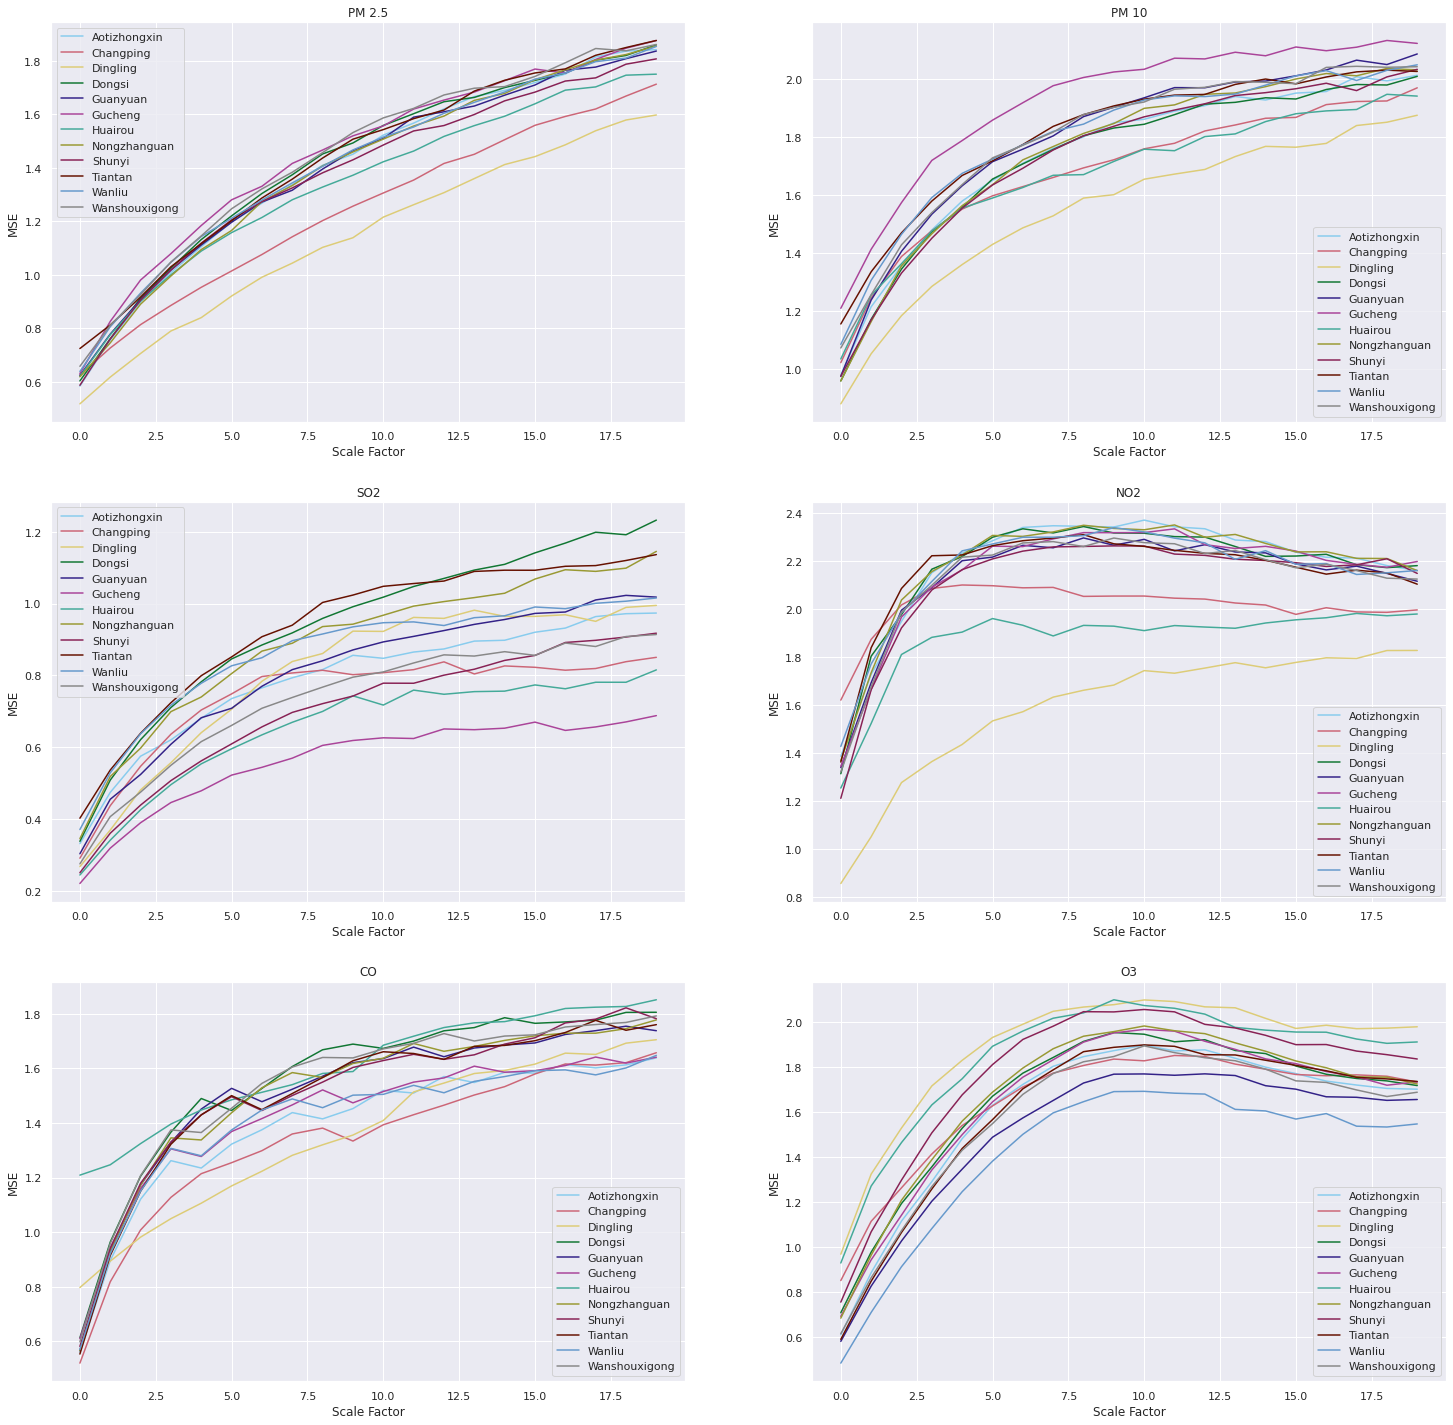

In [0]:
places = ['Aotizhongxin','Changping','Dingling','Dongsi','Guanyuan','Gucheng','Huairou','Nongzhanguan','Shunyi','Tiantan','Wanliu','Wanshouxigong']
colors = ["#88CCEE", "#CC6677", "#DDCC77", "#117733", "#332288", "#AA4499", "#44AA99", "#999933", "#882255", "#661100","#6699CC", "#888888"]
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(25,25))

axes[0][0].set_title("PM 2.5 m=2, r% = 0.1")
for i in range(12):
  axes[0][0].plot(pm25mse[i],color=colors[i],label = places[i])
axes[0][0].set_xlabel("Scale Factor")
axes[0][0].set_ylabel("MSE")
axes[0][0].legend(loc='best')

axes[0][1].set_title("PM 10 m=2, r% = 0.1")
for i in range(12):
  axes[0][1].plot(pm10mse[i],color=colors[i],label = places[i])
axes[0][1].set_xlabel("Scale Factor")
axes[0][1].set_ylabel("MSE")
axes[0][1].legend(loc='best')


axes[1][0].set_title("SO2 m=2, r% = 0.1")
for i in range(12):
  axes[1][0].plot(so2mse[i],color=colors[i],label = places[i])
axes[1][0].set_xlabel("Scale Factor")
axes[1][0].set_ylabel("MSE")
axes[1][0].legend(loc='best')


axes[1][1].set_title("NO2 m=2, r% = 0.1")
for i in range(12):
  axes[1][1].plot(no2mse[i],color=colors[i],label = places[i])
axes[1][1].set_xlabel("Scale Factor")
axes[1][1].set_ylabel("MSE")
axes[1][1].legend(loc='best')


axes[2][0].set_title("CO m=2, r% = 0.1")
for i in range(12):
  axes[2][0].plot(comse[i],color=colors[i],label = places[i])
axes[2][0].set_xlabel("Scale Factor")
axes[2][0].set_ylabel("MSE")
axes[2][0].legend(loc='best')


axes[2][1].set_title("O3 m=2, r% = 0.1")
for i in range(12):
  axes[2][1].plot(o3mse[i],color=colors[i],label = places[i])
axes[2][1].set_xlabel("Scale Factor")
axes[2][1].set_ylabel("MSE")
axes[2][1].legend(loc='best')
plt.show()

## CMSE

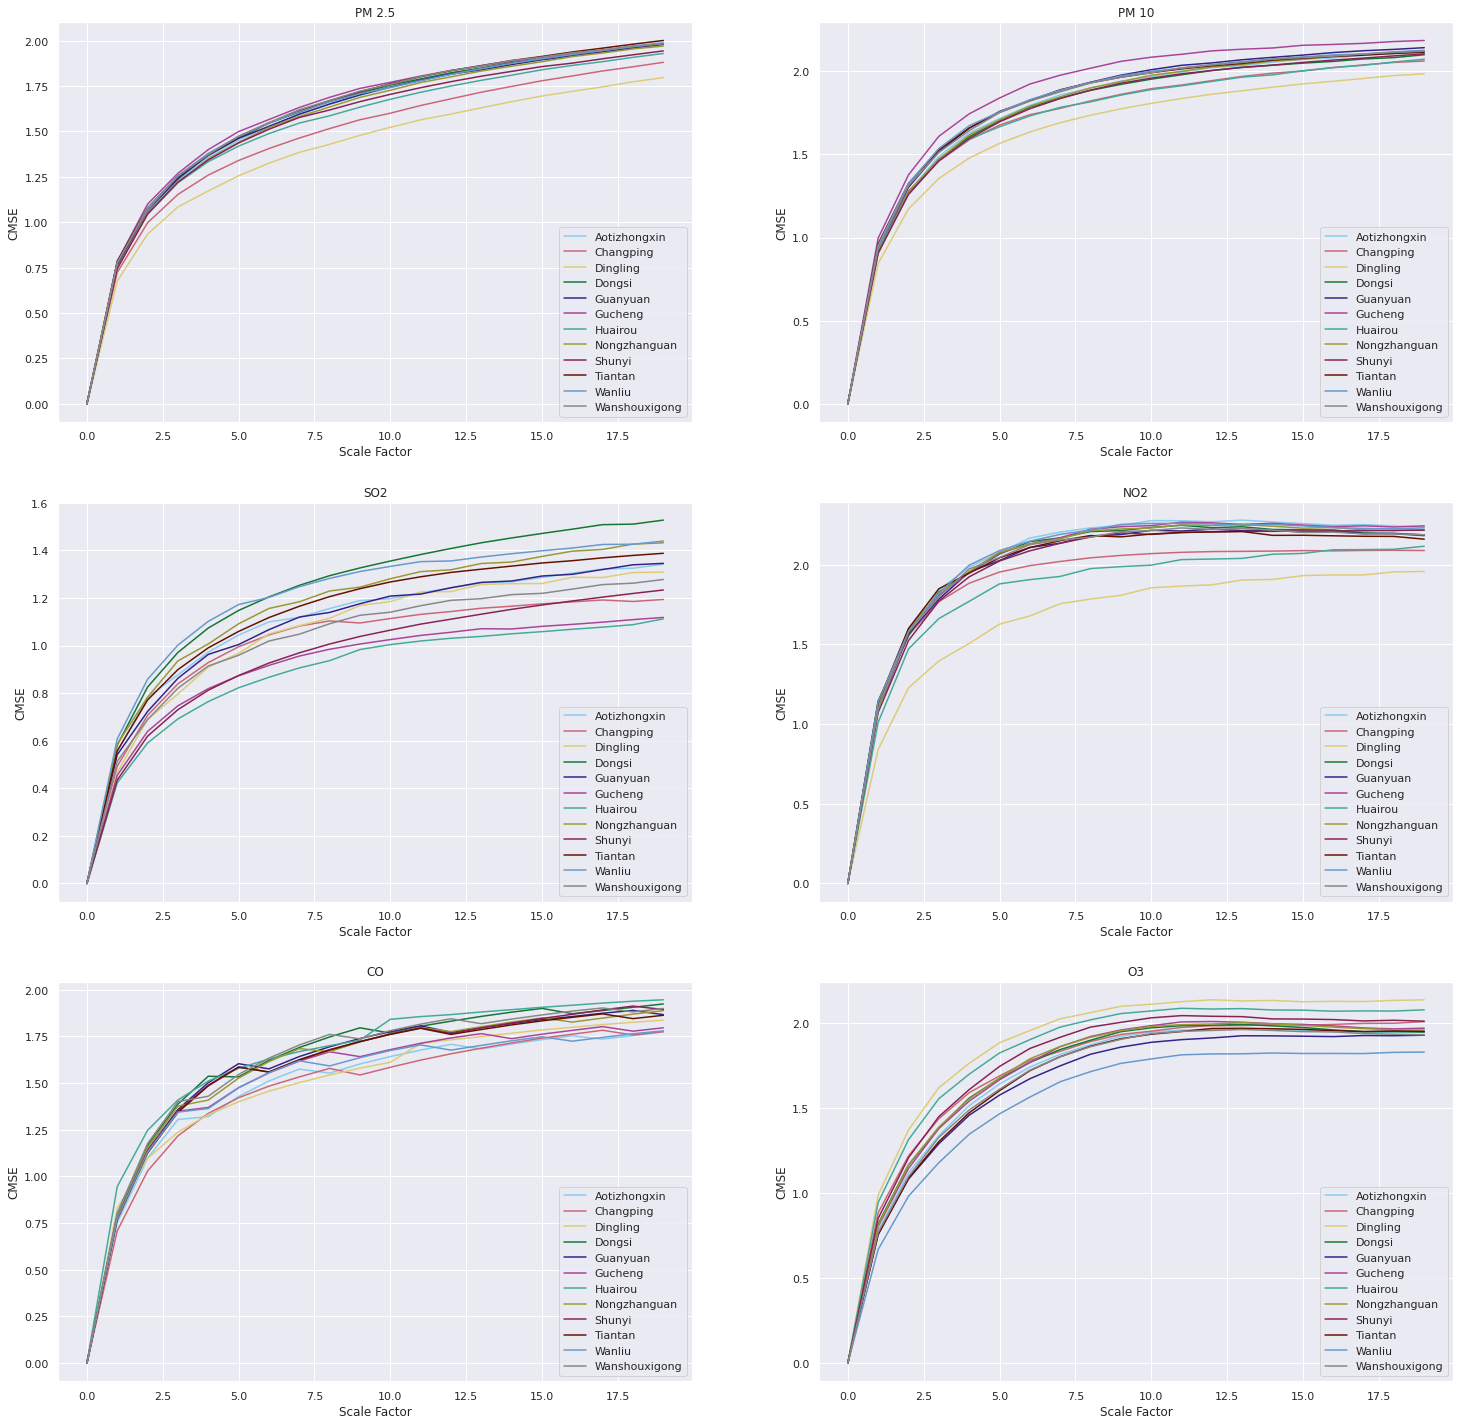

In [0]:
places = ['Aotizhongxin','Changping','Dingling','Dongsi','Guanyuan','Gucheng','Huairou','Nongzhanguan','Shunyi','Tiantan','Wanliu','Wanshouxigong']
colors = ["#88CCEE", "#CC6677", "#DDCC77", "#117733", "#332288", "#AA4499", "#44AA99", "#999933", "#882255", "#661100","#6699CC", "#888888"]
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(25,25))

axes[0][0].set_title("PM 2.5 m=2, r% = 0.1")
for i in range(12):
  axes[0][0].plot(pm25cmse[i],color=colors[i],label = places[i])
axes[0][0].set_xlabel("Scale Factor")
axes[0][0].set_ylabel("CMSE")
axes[0][0].legend(loc='best')

axes[0][1].set_title("PM 10")
for i in range(12):
  axes[0][1].plot(pm10cmse[i],color=colors[i],label = places[i])
axes[0][1].set_xlabel("Scale Factor m=2, r% = 0.1")
axes[0][1].set_ylabel("CMSE")
axes[0][1].legend(loc='best')


axes[1][0].set_title("SO2")
for i in range(12):
  axes[1][0].plot(so2cmse[i],color=colors[i],label = places[i])
axes[1][0].set_xlabel("Scale Factor m=2, r% = 0.1")
axes[1][0].set_ylabel("CMSE")
axes[1][0].legend(loc='best')


axes[1][1].set_title("NO2 m=2, r% = 0.1")
for i in range(12):
  axes[1][1].plot(no2cmse[i],color=colors[i],label = places[i])
axes[1][1].set_xlabel("Scale Factor")
axes[1][1].set_ylabel("CMSE")
axes[1][1].legend(loc='best')


axes[2][0].set_title("CO m=2, r% = 0.1")
for i in range(12):
  axes[2][0].plot(cocmse[i],color=colors[i],label = places[i])
axes[2][0].set_xlabel("Scale Factor")
axes[2][0].set_ylabel("CMSE")
axes[2][0].legend(loc='best')


axes[2][1].set_title("O3 m=2, r% = 0.1")
for i in range(12):
  axes[2][1].plot(o3cmse[i],color=colors[i],label = places[i])
axes[2][1].set_xlabel("Scale Factor")
axes[2][1].set_ylabel("CMSE")
axes[2][1].legend(loc='best')
plt.show()

# m = 24, r = 0.5*std

## MSE

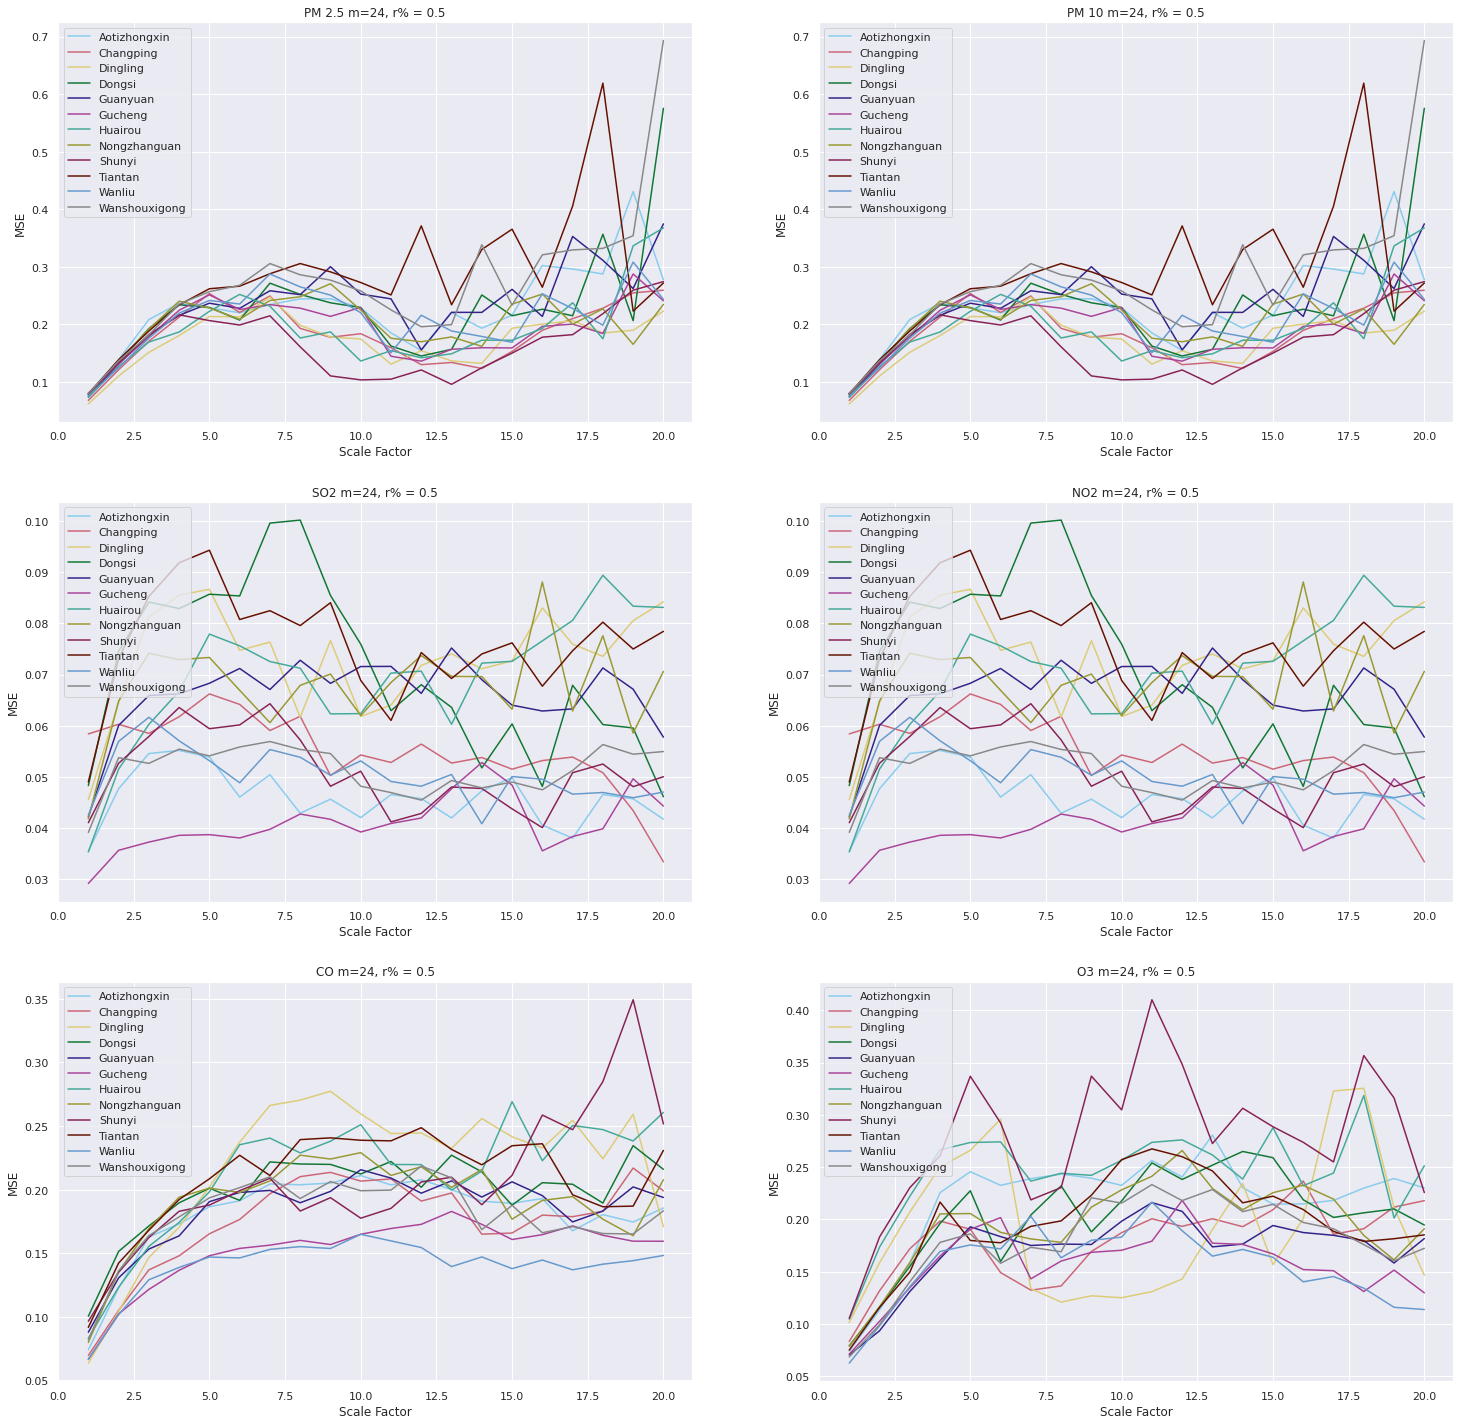

In [0]:
places = ['Aotizhongxin','Changping','Dingling','Dongsi','Guanyuan','Gucheng','Huairou','Nongzhanguan','Shunyi','Tiantan','Wanliu','Wanshouxigong']
colors = ["#88CCEE", "#CC6677", "#DDCC77", "#117733", "#332288", "#AA4499", "#44AA99", "#999933", "#882255", "#661100","#6699CC", "#888888"]
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(25,25))

axes[0][0].set_title("PM 2.5 m=24, r% = 0.5")
for i in range(12):
  xlist = np.insert(pm25mse[i],0,float('nan'))
  axes[0][0].plot(xlist,color=colors[i],label = places[i])
axes[0][0].set_xlabel("Scale Factor")
axes[0][0].set_ylabel("MSE")
axes[0][0].legend(loc='best')
axes[0][0].set_xlim(0)

axes[0][1].set_title("PM 10 m=24, r% = 0.5")
for i in range(12):
  xlist = np.insert(pm25mse[i],0,float('nan'))
  axes[0][1].plot(xlist,color=colors[i],label = places[i])
axes[0][1].set_xlabel("Scale Factor")
axes[0][1].set_ylabel("MSE")
axes[0][1].legend(loc='best')
axes[0][1].set_xlim(0)


axes[1][0].set_title("SO2 m=24, r% = 0.5")
for i in range(12):
  xlist = np.insert(so2mse[i],0,float('nan'))
  axes[1][0].plot(xlist,color=colors[i],label = places[i])
axes[1][0].set_xlabel("Scale Factor")
axes[1][0].set_ylabel("MSE")
axes[1][0].legend(loc='best')
axes[1][0].set_xlim(0)


axes[1][1].set_title("NO2 m=24, r% = 0.5")
for i in range(12):
  xlist = np.insert(so2mse[i],0,float('nan'))
  axes[1][1].plot(xlist,color=colors[i],label = places[i])
axes[1][1].set_xlabel("Scale Factor")
axes[1][1].set_ylabel("MSE")
axes[1][1].legend(loc='best')
axes[1][1].set_xlim(0)

axes[2][0].set_title("CO m=24, r% = 0.5")
for i in range(12):
  xlist = np.insert(comse[i],0,float('nan'))
  axes[2][0].plot(xlist,color=colors[i],label = places[i])
axes[2][0].set_xlabel("Scale Factor")
axes[2][0].set_ylabel("MSE")
axes[2][0].legend(loc='best')
axes[2][0].set_xlim(0)

axes[2][1].set_title("O3 m=24, r% = 0.5")
for i in range(12):
  xlist = np.insert(o3mse[i],0,float('nan'))
  axes[2][1].plot(xlist,color=colors[i],label = places[i])
axes[2][1].set_xlabel("Scale Factor")
axes[2][1].set_ylabel("MSE")
axes[2][1].legend(loc='best')
axes[2][1].set_xlim(0)

plt.show()

## CMSE

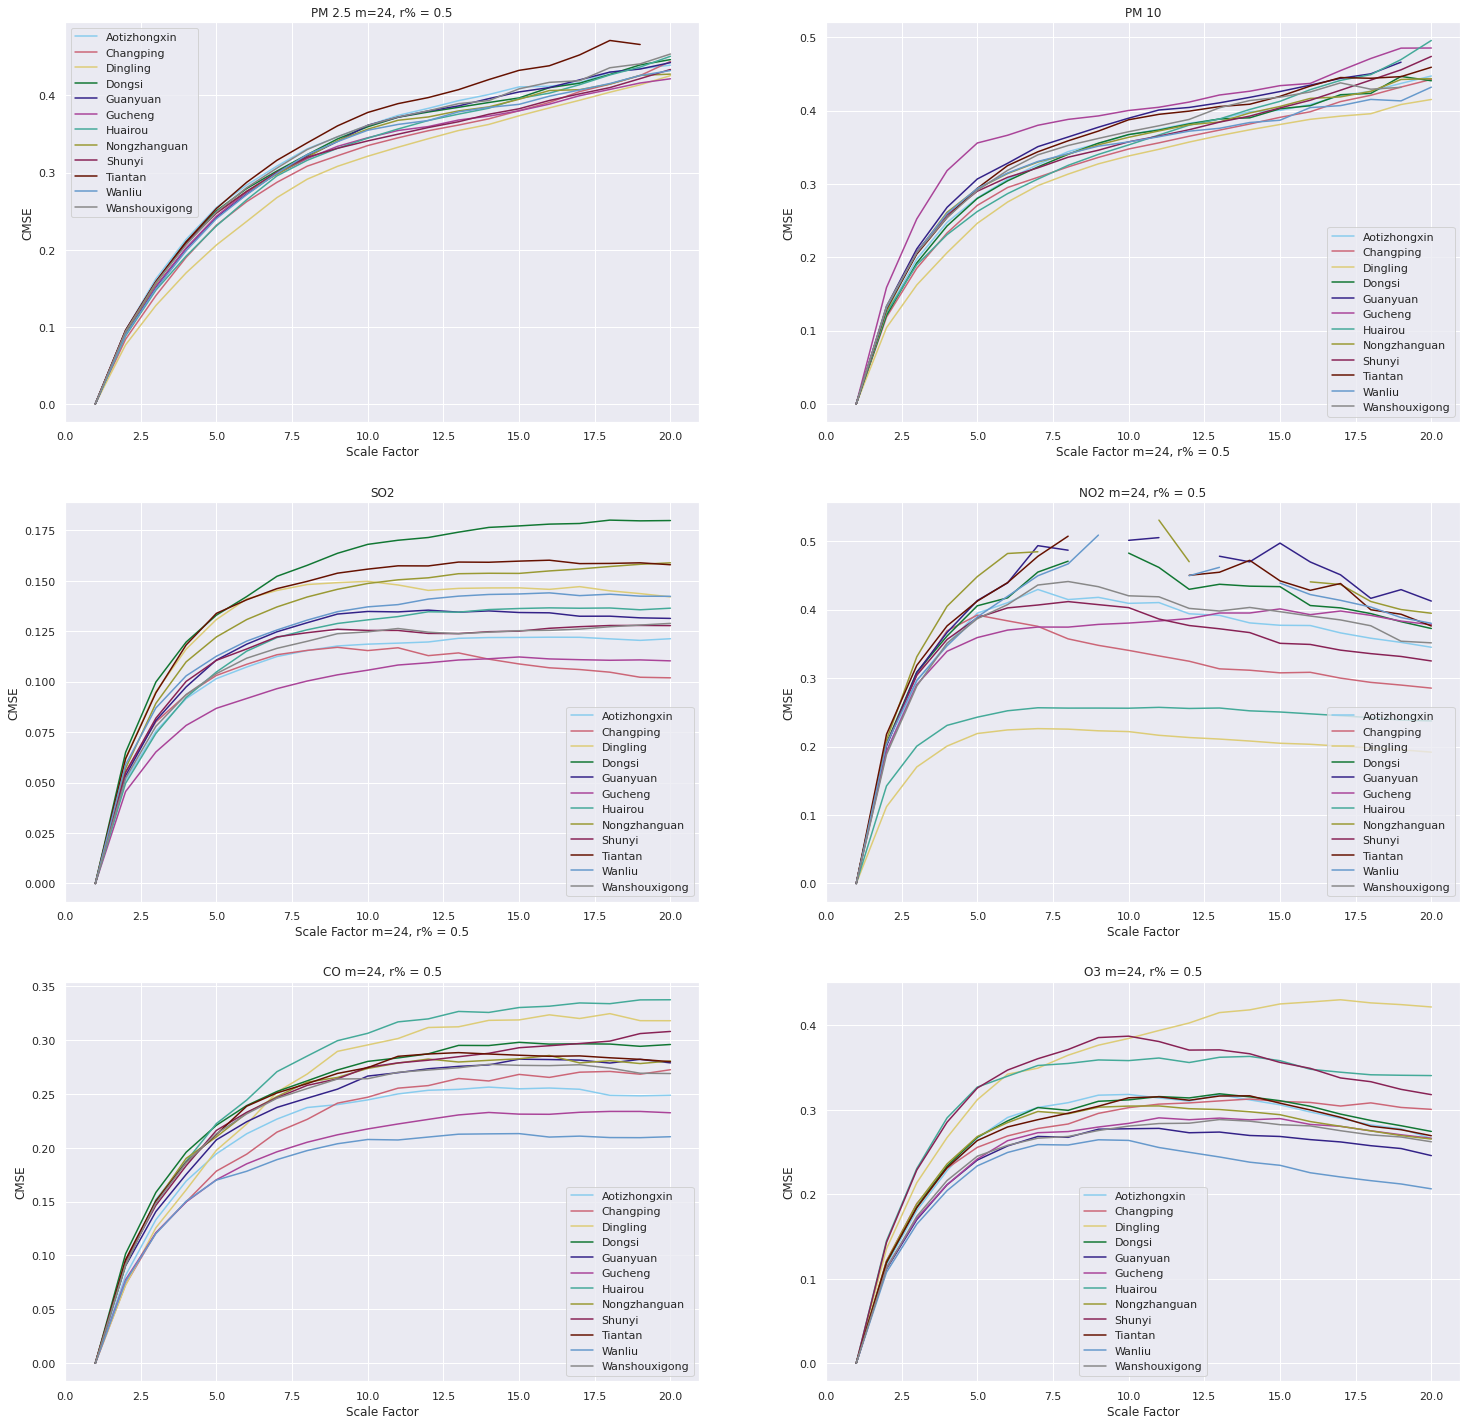

In [0]:
places = ['Aotizhongxin','Changping','Dingling','Dongsi','Guanyuan','Gucheng','Huairou','Nongzhanguan','Shunyi','Tiantan','Wanliu','Wanshouxigong']
colors = ["#88CCEE", "#CC6677", "#DDCC77", "#117733", "#332288", "#AA4499", "#44AA99", "#999933", "#882255", "#661100","#6699CC", "#888888"]
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(25,25))

axes[0][0].set_title("PM 2.5 m=24, r% = 0.5")
for i in range(12):
  xlist = np.insert(pm25cmse[i],0,float('nan'))
  axes[0][0].plot(xlist,color=colors[i],label = places[i])
axes[0][0].set_xlabel("Scale Factor")
axes[0][0].set_ylabel("CMSE")
axes[0][0].legend(loc='best')
axes[0][0].set_xlim(0)


axes[0][1].set_title("PM 10")
for i in range(12):
  xlist = np.insert(pm10cmse[i],0,float('nan'))
  axes[0][1].plot(xlist,color=colors[i],label = places[i])
axes[0][1].set_xlabel("Scale Factor m=24, r% = 0.5")
axes[0][1].set_ylabel("CMSE")
axes[0][1].legend(loc='best')
axes[0][1].set_xlim(0)


axes[1][0].set_title("SO2")
for i in range(12):
  xlist = np.insert(so2cmse[i],0,float('nan'))
  axes[1][0].plot(xlist,color=colors[i],label = places[i])
axes[1][0].set_xlabel("Scale Factor m=24, r% = 0.5")
axes[1][0].set_ylabel("CMSE")
axes[1][0].legend(loc='best')
axes[1][0].set_xlim(0)


axes[1][1].set_title("NO2 m=24, r% = 0.5")
for i in range(12):
  xlist = np.insert(no2cmse[i],0,float('nan'))
  axes[1][1].plot(xlist,color=colors[i],label = places[i])
axes[1][1].set_xlabel("Scale Factor")
axes[1][1].set_ylabel("CMSE")
axes[1][1].legend(loc='best')
axes[1][1].set_xlim(0)


axes[2][0].set_title("CO m=24, r% = 0.5")
for i in range(12):
  xlist = np.insert(cocmse[i],0,float('nan'))
  axes[2][0].plot(xlist,color=colors[i],label = places[i])
axes[2][0].set_xlabel("Scale Factor")
axes[2][0].set_ylabel("CMSE")
axes[2][0].legend(loc='best')
axes[2][0].set_xlim(0)


axes[2][1].set_title("O3 m=24, r% = 0.5")
for i in range(12):
  xlist = np.insert(o3cmse[i],0,float('nan'))
  axes[2][1].plot(xlist,color=colors[i],label = places[i])
axes[2][1].set_xlabel("Scale Factor")
axes[2][1].set_ylabel("CMSE")
axes[2][1].legend(loc='best')
axes[2][1].set_xlim(0)

plt.show()

In [0]:
filename = str("Aotizhongxin"+"_"+"PM2.5"+"_m="+str(m)+"_r%="+str(tolerance_per))
print(filename)
testa =load_obj(filename+"_mse")
testb = load_obj(filename+"_cmse")
print(testa)

Aotizhongxin_PM2.5_m=24_r%=0.1
[0.17349196 0.2599404  0.47000363 0.51082562 0.69314718        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan]


No handles with labels found to put in legend.


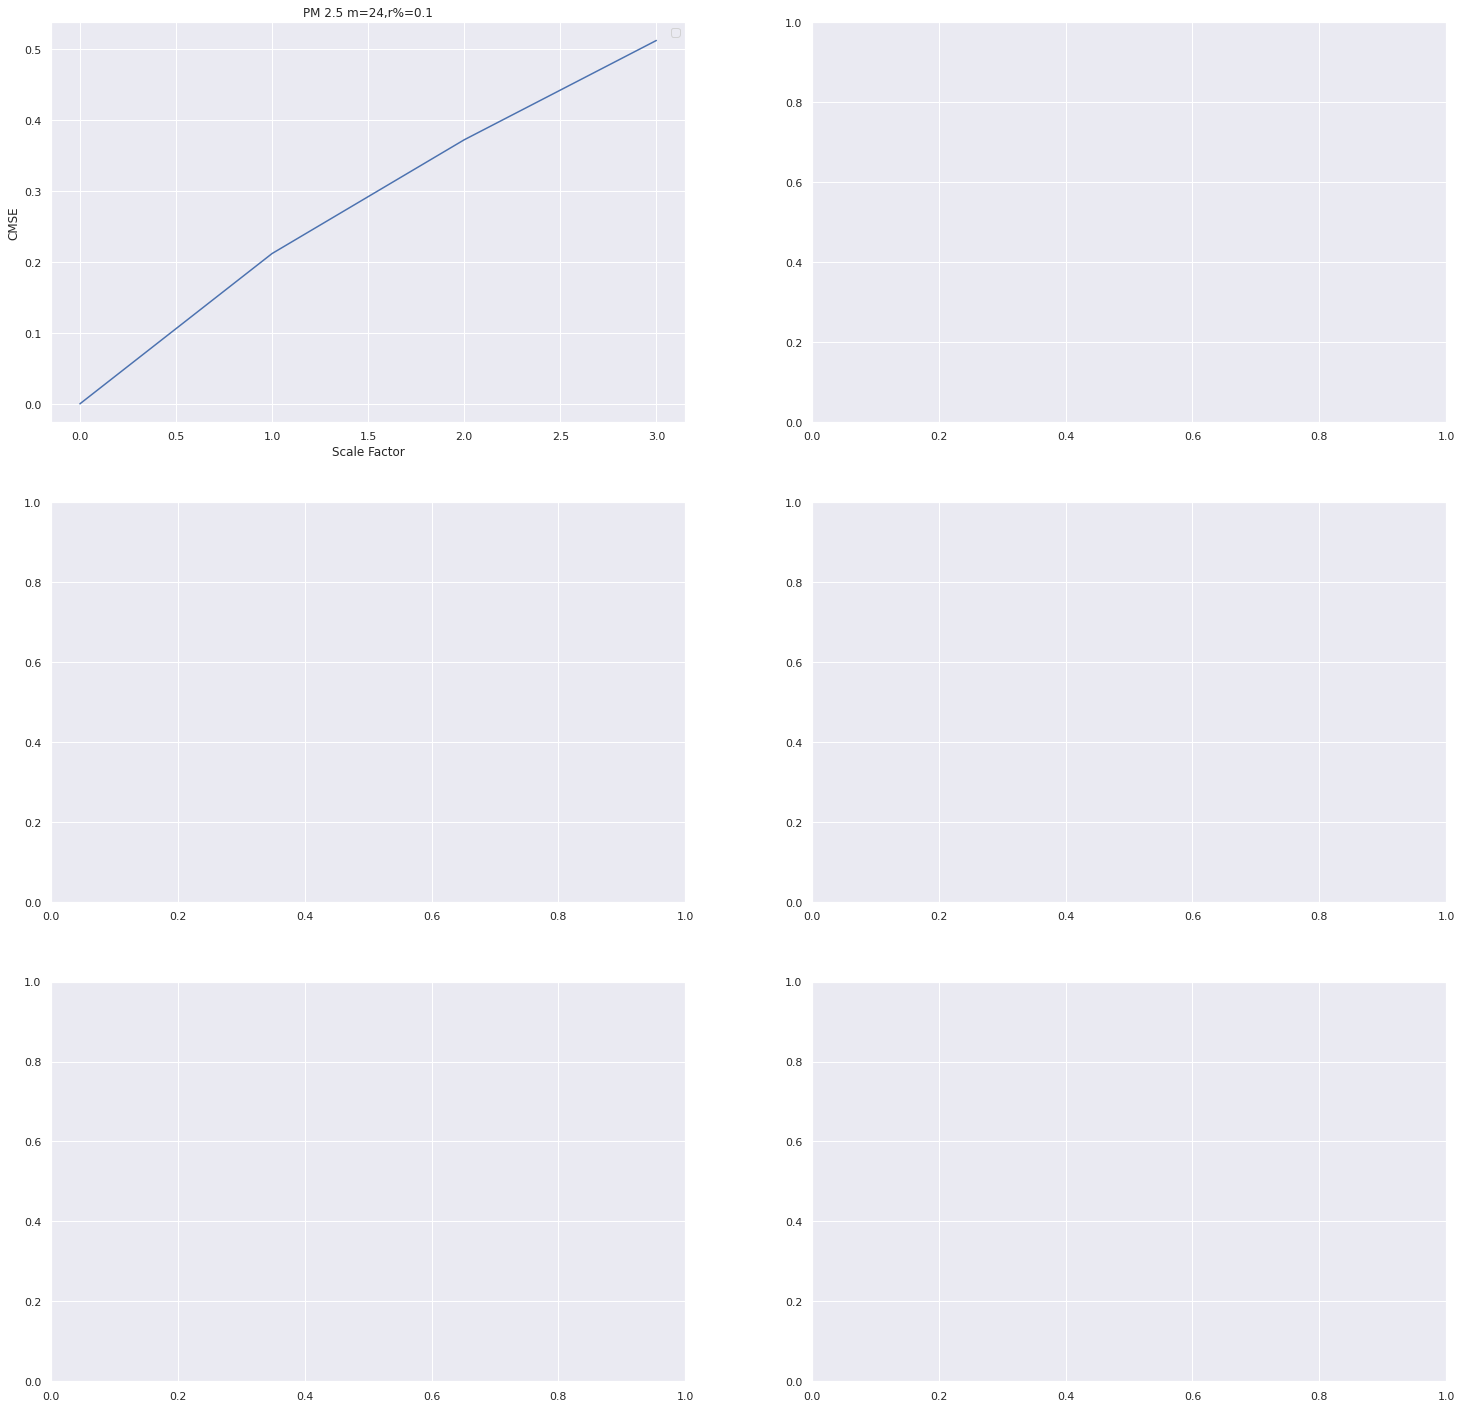

In [0]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(25,25))

axes[0][0].set_title("PM 2.5 m=24,r%=0.1")
axes[0][0].plot(testb)
axes[0][0].set_xlabel("Scale Factor")
axes[0][0].set_ylabel("CMSE")
axes[0][0].legend(loc='best')